In [1]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('C/1_feladat_GM_01.txt') as f:
    theta2, I, korr =[], [], []
    for sor in f: # így iterálhatunk végig egy adatfolyamon vagy file-on
        if sor[0]!='*': # file-ban lévő komment kiszedése
            theta2.append( float(sor.split()[0]) )
            I.append(  float(sor.split()[1]) )
            korr.append( float(sor.split()[2]) )

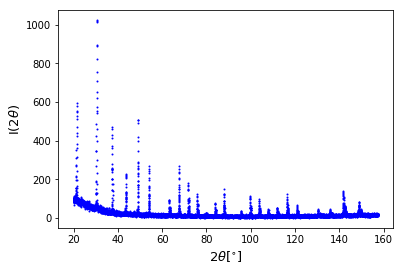

In [3]:
plot(theta2, I, 'b.', markersize = 2)
#xlim(63, 63.5)
#ylim(0, 200)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
savefig('1_spekt.png')

In [4]:
def Gauss(x, a, mu, sigma, h):
    #return (a/sqrt(2*pi*sigma**2)) * exp(-(x-mu)**2 / (2*sigma**2)) + h
    return a * exp(-(x-mu)**2 / (2*sigma**2)) + h
    
def illeszt(f, x, y, x1, x2, a1, mu1, sigma1, h1):
    x = array(x)
    y = array(y)
    popt,pcov=curve_fit(f, x[(x>x1)*(x<x2)], y[(x>x1)*(x<x2)], p0 = [a1, mu1, sigma1, h1]) # az illesztés elvégzése
    perr = sqrt(diag(pcov))      # az illesztési paraméterek hibáinak meghatározása
    print(popt, '+-', perr)
    return popt, perr

első csúcs: a, mu, sigma, h
[4.61581957e+02 2.13837419e+01 5.29475617e-02 1.02039067e+02] +- [8.34188358e+00 1.06905871e-03 1.17338814e-03 2.98159126e+00]
2theta = 21.383741933256065 +- 0.001069058711775336


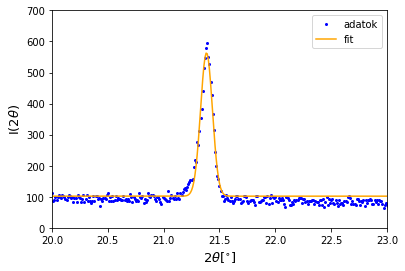

In [5]:
print('első csúcs: a, mu, sigma, h')
egy, egyerr = illeszt(Gauss, theta2, I, 21, 21.75, 100, 21.4, 0.01, 100)
print('2theta =', egy[1], '+-', egyerr[1])

plot(theta2, I, 'b.', markersize = 4, label = 'adatok')
plot(theta2, Gauss(theta2, *egy), color = 'orange', label = 'fit')
xlim(20, 23)
ylim(0, 700)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('1_csucs.png')

2. csúcs: a, mu, sigma, h
[8.67990283e+02 3.04188187e+01 5.70433769e-02 6.99816120e+01] +- [1.93458497e+01 1.38869795e-03 1.61510156e-03 8.87338813e+00]
2theta = 30.418818729240247 +- 0.0013886979454355178


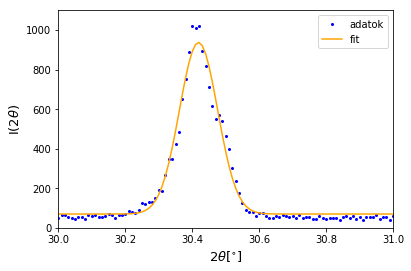

In [6]:
print('2. csúcs: a, mu, sigma, h')
ket, keterr = illeszt(Gauss, theta2, I, 30.1, 30.7, 100, 30.4, 0.1, 40)
print('2theta =', ket[1], '+-', keterr[1])

plot(theta2, I, 'b.', markersize = 4, label = 'adatok')
plot(theta2, Gauss(theta2, *ket), color = 'orange', label = 'fit')
xlim(30, 31)
ylim(0, 1100)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('2_csucs.png')

3. csúcs: a, mu, sigma, h
[3.93694110e+02 3.74670818e+01 3.80738121e-02 6.11513332e+01] +- [9.27962927e+00 1.60925480e-03 1.84656855e-03 6.42642113e+00]
2theta = 37.46708181349566 +- 0.0016092547998222385


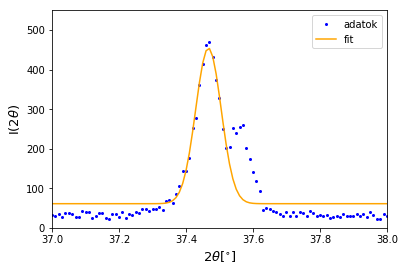

In [7]:
print('3. csúcs: a, mu, sigma, h')
har, harerr = illeszt(Gauss, theta2, I, 37.3, 37.5, 100, 37.45, 0.1, 10)
print('2theta =', har[1], '+-', harerr[1])

plot(theta2, I, 'b.', markersize = 4, label = 'adatok')
plot(theta2, Gauss(theta2, *har), color = 'orange', label = 'fit')
xlim(37, 38)
ylim(0, 550)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('3_csucs.png')

4. csúcs: a, mu, sigma, h
[1.84027307e+02 4.35332714e+01 3.45058755e-02 4.51174337e+01] +- [6.28374158e+00 1.07342437e-03 1.57935210e-03 4.92811993e+00]
2theta = 43.53327142389231 +- 0.0010734243741874097


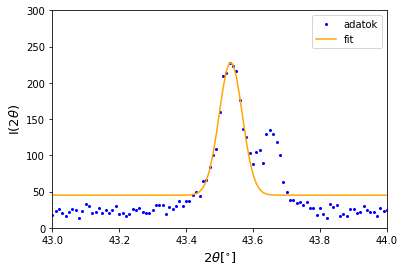

In [8]:
print('4. csúcs: a, mu, sigma, h')
negy, negyerr = illeszt(Gauss, theta2, I, 43.4, 43.6, 200, 43.48, 0.2, 10)
print('2theta =', negy[1], '+-', negyerr[1])

plot(theta2, I, 'b.', markersize = 4, label = 'adatok')
plot(theta2, Gauss(theta2, *negy), color = 'orange', label = 'fit')
xlim(43, 44)
ylim(0, 300)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('4_csucs.png')

5. csúcs: a, mu, sigma, h
[4.57182289e+02 4.89819011e+01 3.12177964e-02 4.71797412e+01] +- [1.13002116e+01 1.04141338e-03 1.27252795e-03 6.10473899e+00]
2theta = 48.98190106130369 +- 0.0010414133807651537


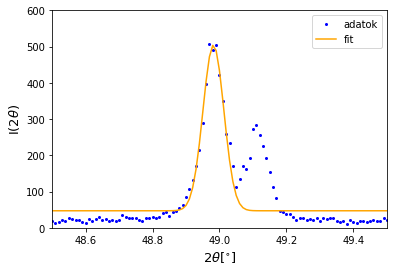

In [9]:
print('5. csúcs: a, mu, sigma, h')
ot, oterr = illeszt(Gauss, theta2, I, 48.8, 49.02, 100, 48.9, 0.2, 10)
print('2theta =', ot[1], '+-', oterr[1])

plot(theta2, I, 'b.', markersize = 4, label = 'adatok')
plot(theta2, Gauss(theta2, *ot), color = 'orange', label = 'fit')
xlim(48.5, 49.5)
ylim(0, 600)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('5_csucs.png')

6. csúcs: a, mu, sigma, h
[ 2.25074055e+02  5.40135449e+01 -3.11185486e-02  3.92950051e+01] +- [5.41343392e+00 6.59959689e-04 1.01790147e-03 4.49395607e+00]
2theta = 54.013544935553945 +- 0.0006599596885607825


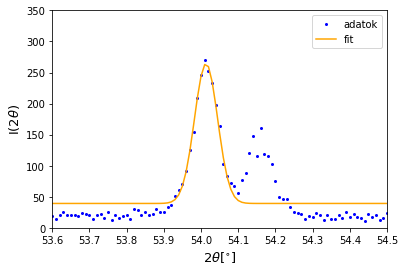

In [10]:
print('6. csúcs: a, mu, sigma, h')
hat, haterr = illeszt(Gauss, theta2, I, 53.9, 54.07, 100, 54, 0.2, 10)
print('2theta =', hat[1], '+-', haterr[1])

plot(theta2, I, 'b.', markersize = 4, label = 'adatok')
plot(theta2, Gauss(theta2, *hat), color = 'orange', label = 'fit')
xlim(53.6, 54.5)
ylim(0, 350)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('6_csucs.png')

7. csúcs: a, mu, sigma, h
[7.86606965e+01 6.32444098e+01 3.28085138e-02 1.76864204e+01] +- [2.62898523e+00 1.06408581e-03 1.44414378e-03 1.82574399e+00]
2theta = 63.24440982698509 +- 0.0010640858147725849


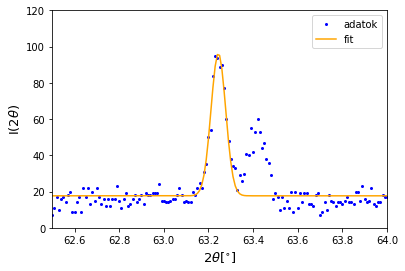

In [11]:
print('7. csúcs: a, mu, sigma, h')
het, heterr = illeszt(Gauss, theta2, I, 63.1, 63.31, 50, 63.2, 0.2, 10)
print('2theta =',het[1], '+-', heterr[1])

plot(theta2, I, 'b.', markersize = 4, label = 'adatok')
plot(theta2, Gauss(theta2, *het), color = 'orange', label = 'fit')
xlim(62.5, 64)
ylim(0, 120)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('7_csucs.png')

In [12]:
theta = array([egy[1], ket[1], har[1], negy[1], ot[1], hat[1], het[1]]) * 0.5 * pi / 180
#a hiba mégsem így, mert 0,01 mindig nagyobb (ez van megadva)
thetaerr = array([egyerr[1], keterr[1], harerr[1], negyerr[1], oterr[1], haterr[1], heterr[1]]) * 0.5 * pi / 180
lam = array([0.154184, 0.154184, 0.154056, 0.154056, 0.154056, 0.154056, 0.154056]) #nm-ben számolok

In [13]:
perd2 = (2 * sin(theta) / lam)**2
derr = abs((2 * sin(theta) / lam) * (thetaerr/tan(theta)))
perd2err = derr * sqrt(perd2**3)
print(perd2, '+-', perd2err)

[ 5.79157339 11.58072491 17.38464211 23.17638442 28.96380269 34.75343655
 46.33283765] +- [0.0016574  0.00597812 0.01251505 0.01260129 0.0167363  0.01364795
 0.03237468]


In [14]:
def lin(x, a, b):
    return a*x + b

In [15]:
N = [1, 2, 3, 4, 5, 6, 8]
Nbcc = [2, 4, 6, 8, 10, 12, 14]
Nfcc = [3, 4, 8, 11, 12, 16, 19]
NC = [3, 8, 11, 16, 19, 24]

In [16]:
perd2/N

array([5.79157339, 5.79036246, 5.7948807 , 5.79409611, 5.79276054,
       5.79223943, 5.79160471])

In [17]:
perd2/Nbcc

array([2.8957867 , 2.89518123, 2.89744035, 2.89704805, 2.89638027,
       2.89611971, 3.3094884 ])

In [18]:
perd2/Nfcc

array([1.93052446, 2.89518123, 2.17308026, 2.10694404, 2.41365022,
       2.17208978, 2.4385704 ])

In [19]:
perd2[:6]/NC

array([1.93052446, 1.44759061, 1.58042201, 1.44852403, 1.52441067,
       1.44805986])

In [20]:
a = sqrt(1/(perd2/N))
print('rácsállandó: a=', a, 'nm')

rácsállandó: a= [0.41552936 0.41557281 0.41541077 0.41543889 0.41548678 0.41550547
 0.41552824] nm


In [21]:
with open('C/2 feladat/2_feladat AlMg.DAT') as f:
    t2, Iam =[], []
    for sor in f: # így iterálhatunk végig egy adatfolyamon vagy file-on
        if sor[0]!='*': # file-ban lévő komment kiszedése
            t2.append( float(sor.split()[0]) )
            Iam.append(  float(sor.split()[1]) )

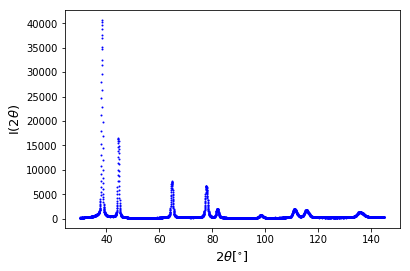

In [22]:
plot(t2, Iam, 'b.', markersize = 2)
#xlim(63, 67)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
savefig('AlMg_spekt.png')

1.mg csúcs: a, mu, sigma, h
[3.76593325e+04 3.83022735e+01 2.08357368e-01 1.84233825e+03] +- [2.15936349e+02 1.32191257e-03 1.48808018e-03 8.73324624e+01]
2theta = 38.30227345026443 +- 0.0013219125686958157


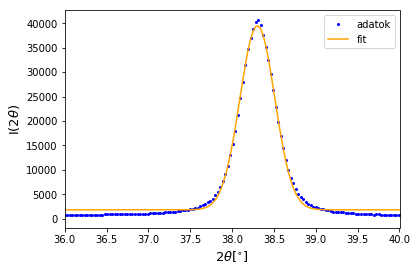

In [23]:
print('1.mg csúcs: a, mu, sigma, h')
emg, emgerr = illeszt(Gauss, t2, Iam, 37, 39.5, 10000, 38.3, 1, 100)
print('2theta =', emg[1], '+-', emgerr[1])

plot(t2, Iam, 'b.', markersize = 4, label = 'adatok')
plot(t2, Gauss(t2, *emg), color = 'orange', label = 'fit')
xlim(36, 40)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('AlMg_1_csucs.png')

2.mg csúcs: a, mu, sigma, h
[ 1.51738359e+04  4.45174404e+01 -2.36308488e-01  1.13890003e+03] +- [7.36731870e+01 1.21288523e-03 1.52310365e-03 4.18751825e+01]
2theta = 44.5174403675985 +- 0.0012128852283101758


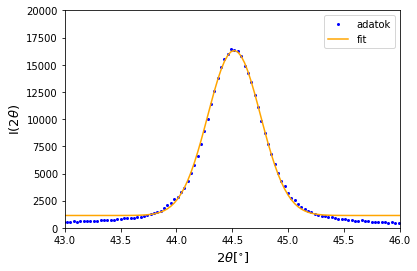

In [24]:
print('2.mg csúcs: a, mu, sigma, h')
kmg, kmgerr = illeszt(Gauss, t2, Iam, 43.5, 45.5, 10000, 44.5, 1, 100)
print('2theta =', kmg[1], '+-', kmgerr[1])

plot(t2, Iam, 'b.', markersize = 4, label = 'adatok')
plot(t2, Gauss(t2, *kmg), color = 'orange', label = 'fit')
xlim(43, 46)
ylim(0, 20000)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('AlMg_2_csucs.png')

3.mg csúcs: a, mu, sigma, h
[6.78586953e+03 6.47504248e+01 3.26517306e-01 7.05806651e+02] +- [4.16198723e+01 2.06319979e-03 2.73384152e-03 2.64729049e+01]
2theta = 64.75042476719527 +- 0.0020631997906145312


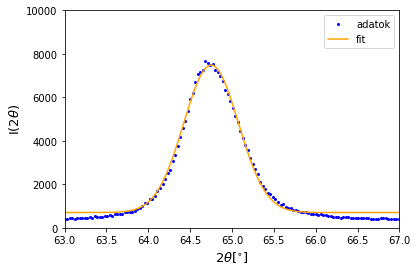

In [25]:
print('3.mg csúcs: a, mu, sigma, h')
hmg, hmgerr = illeszt(Gauss, t2, Iam, 63.5, 66, 10000, 64.7, 1, 100)
print('2theta =', hmg[1], '+-', hmgerr[1])

plot(t2, Iam, 'b.', markersize = 4, label = 'adatok')
plot(t2, Gauss(t2, *hmg), color = 'orange', label = 'fit')
xlim(63, 67)
ylim(0, 10000)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('AlMg_3_csucs.png')

In [26]:
t = array([emg[1], kmg[1], hmg[1]]) * 0.5 * pi /180
#terr = array([emgerr[1], kmgerr[1], hmgerr[1]]) * 0.5 * pi /180
l = array([0.154184, 0.154184, 0.154184])
X = cos(t)**2 * ((1/sin(t)) + 1/(t))
Xerr = (0.01*pi/180)*(abs(-sin(2*t) * ((1/sin(t)) + 1/(t))) + abs(cos(t)**2 * ((-cos(t)/(sin(t)**2)) + (-1/t**2))))
n = array([3, 4, 8])

In [27]:
pd2 = (2 * sin(t) / l)**2
dhklerr =abs(((0.01*pi/180)/tan(t)) * l/(2*sin(t)))
pd2err = sqrt(pd2**3)*dhklerr

In [60]:
amg = sqrt(1/(pd2/n))
amgerr = (1/(2*amg)) * n/(pd2**2) * pd2err
print('a_hkl =', amg, '+-', amgerr, 'nm')
amg_atl = sum(amg)/3
amg_err = amg[2] - amg_atl
amg_err = amg_err * np.ones(3)
print(amg_err)

a_hkl = [0.40701944 0.40704404 0.40721717] +- [1.02277864e-04 8.67879145e-05 5.60499932e-05] nm
[0.00012362 0.00012362 0.00012362]


<ErrorbarContainer object of 3 artists>

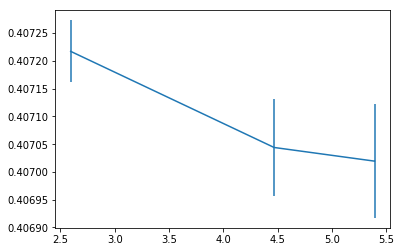

In [29]:
errorbar(X, amg,xerr = Xerr, yerr = amgerr) # X hibája kicsi, nem veszem figyelembe az illesztésnél

In [30]:
popt,pcov=curve_fit(lin, X, amg, sigma = amg_err)
perr = sqrt(diag(pcov))      # az illesztési paraméterek hibáinak meghatározása
print(popt, '+-', perr)
print('a0=', popt[1], '+-', perr[1], 'nm')

[-7.39042175e-05  4.07400261e-01] +- [1.62113759e-05 6.98701776e-05]
a0= 0.40740026075582586 +- 6.9870177592909e-05 nm


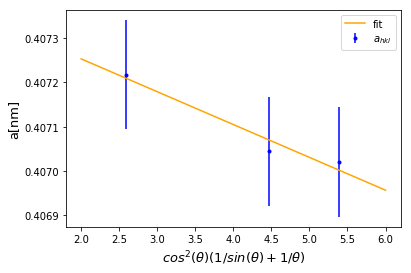

In [31]:
x = linspace(2, 6, 100)
errorbar(X, amg, yerr = amg_err, linestyle = '', color = 'b', marker = '.', label = r'$a_{hkl}$')
plot(x, lin(x, *popt), color = 'orange', label = 'fit')
legend()
xlabel(r'$cos^2(\theta) (1/sin(\theta) + 1/\theta)$', fontsize = 13)
ylabel('a[nm]', fontsize = 13)
savefig('AlMg_a.png')

In [32]:
with open('C/2 feladat/2_feladat AlMg_konc.dat') as f:
    cc, aA =[], []
    for sor in f: # így iterálhatunk végig egy adatfolyamon vagy file-on
        if sor[0]!='a': # file-ban lévő komment kiszedése
            cc.append( float(sor.split()[0]) )
            aA.append(  float(sor.split()[1]) )

In [33]:
pc,pe=curve_fit(lin, aA, cc)
pcerr = sqrt(diag(pe)) # az illesztési paraméterek hibáinak meghatározása
print('a, b')
print(pc, '+-', pcerr)

a, b
[2288.70106055 -926.59194697] +- [22.11960771  8.98057135]


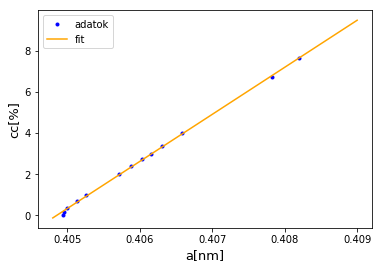

In [34]:
xa = linspace(0.4048, 0.409, 100)
plot(aA, cc, 'b.', label = 'adatok')
plot(xa, lin(xa, *pc), color = 'orange', label = 'fit')
xlabel('a[nm]', fontsize = 13)
ylabel('cc[%]', fontsize = 13)
legend()
savefig('cc.png')

In [59]:
conc = pc[0]*popt[1] + pc[1]
concerr = abs(pc[0]*perr[1])# + abs(popt[1]*pcerr[0]) + abs(pcerr[1])
print('Mg koncentráció:', conc, '+-', concerr, '%')

Mg koncentráció: 5.825461893107217 +- 0.1599119495577628 %


In [36]:
with open('C/3_feladat_GM_01.dat') as f:
    t2_f3, I_f3, nosé =[], [], []
    for sor in f: # így iterálhatunk végig egy adatfolyamon vagy file-on
        if sor[0]!='*': # file-ban lévő komment kiszedése
            t2_f3.append( float(sor.split()[0]) )
            I_f3.append( float(sor.split()[1]) )
            nosé.append( float(sor.split()[2]) )

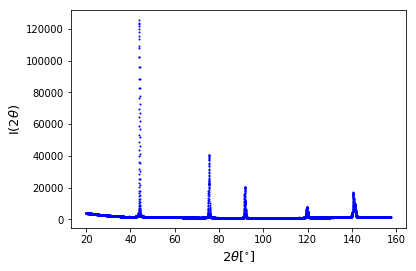

In [37]:
plot(t2_f3, I_f3, 'b.', markersize = 2)
#xlim(139, 142)
#ylim(0, 30000)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
savefig('fazis_spekt.png')

1. f3 csúcs: a, mu, sigma, h
[1.14583976e+05 4.40153734e+01 1.06056829e-01 4.38038649e+03] +- [7.54968516e+02 7.53382321e-04 9.04371598e-04 3.82273696e+02]
2theta = 44.0153734123509 +- 0.0007533823208085778


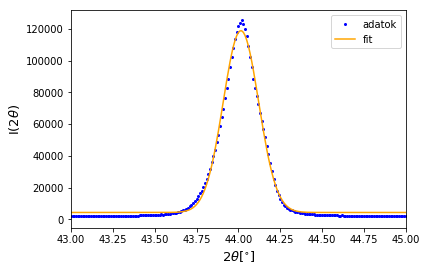

In [38]:
print('1. f3 csúcs: a, mu, sigma, h')
ef3, ef3err = illeszt(Gauss, t2_f3, I_f3, 43.5, 44.5, 10000, 44, 1, 3000)
print('2theta =', ef3[1], '+-', ef3err[1])

plot(t2_f3, I_f3, 'b.', markersize = 4, label = 'adatok')
plot(t2_f3, Gauss(t2_f3, *ef3), color = 'orange', label = 'fit')
xlim(43, 45)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('fazis_1_csucs.png')

2. f3 csúcs: a, mu, sigma, h
[3.58265893e+04 7.53499576e+01 1.02719793e-01 3.96660566e+03] +- [2.46756965e+02 8.68698490e-04 1.24837709e-03 2.15167874e+02]
2theta = 75.34995757084273 +- 0.0008686984895113766


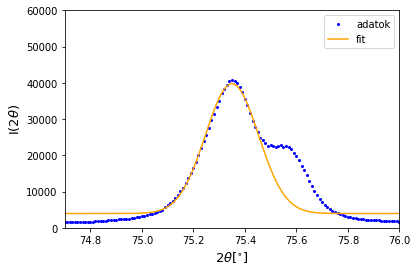

In [39]:
print('2. f3 csúcs: a, mu, sigma, h')
kf3, kf3err = illeszt(Gauss, t2_f3, I_f3, 75, 75.45, 10000, 75.37, 0.5, 1000)
print('2theta =', kf3[1], '+-', kf3err[1])

plot(t2_f3, I_f3, 'b.', markersize = 4, label = 'adatok')
plot(t2_f3, Gauss(t2_f3, *kf3), color = 'orange', label = 'fit')
xlim(74.7, 76)
ylim(0, 60000)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('fazis_2_csucs.png')

3. f3 csúcs: a, mu, sigma, h
[ 1.80027939e+04  9.15317469e+01 -1.12073927e-01  1.94768180e+03] +- [1.03479172e+02 1.47567185e-03 1.47887914e-03 6.42257400e+01]
2theta = 91.53174692428739 +- 0.001475671850660544


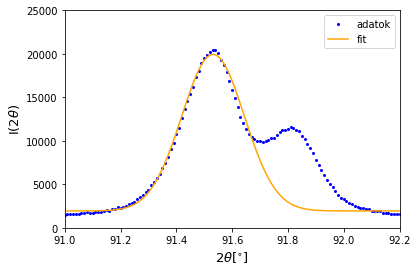

In [40]:
print('3. f3 csúcs: a, mu, sigma, h')
hf3, hf3err = illeszt(Gauss, t2_f3, I_f3, 91, 91.6, 1000, 91.5, 1, 1000)
print('2theta =', hf3[1], '+-', hf3err[1])

plot(t2_f3, I_f3, 'b.', markersize = 4, label = 'adatok')
plot(t2_f3, Gauss(t2_f3, *hf3), color = 'orange', label = 'fit')
xlim(91, 92.2)
ylim(0, 25000)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('fazis_3_csucs.png')

In [41]:
theta_f3 = array([ef3[1], kf3[1], hf3[1]]) *0.5*pi/180
lam_f3 = array([0.154056, 0.154056, 0.154056])

d_f3 = lam_f3 / (2*sin(theta_f3))
d_f3err = abs(d_f3*(0.01*pi/180)/tan(theta_f3))
print('d_hkl =', d_f3, '+-', d_f3err, 'nm')

d_hkl = [0.20555546 0.12603131 0.10750665] +- [8.87624147e-05 2.84859935e-05 1.82684146e-05] nm


A szögeket és a $d_{hkl}$-eket összevetve ez szén (PDF060675.pdf)

In [42]:
with open('C/LaB6.dat') as f:
    t2_f3_inst, I_f3_inst, nosé_inst =[], [], []
    for sor in f: # így iterálhatunk végig egy adatfolyamon vagy file-on
        if sor[0]!='*': # file-ban lévő komment kiszedése
            t2_f3_inst.append( float(sor.split()[0]) )
            I_f3_inst.append( float(sor.split()[1]) )
            nosé_inst.append( float(sor.split()[2]) )

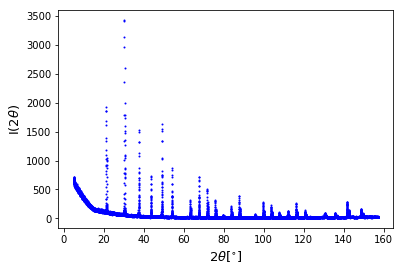

In [43]:
plot(t2_f3_inst, I_f3_inst, 'b.', markersize = 2)
#xlim(43.3, 43.7)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
savefig('inst_spekt.png')

f3 inst kiszélesedés csúcs: a, mu, sigma, h
[ 6.28873243e+02  4.35213971e+01 -1.61277845e-02  1.00083394e+02] +- [6.89254617e+00 1.72601696e-04 2.49324604e-04 5.08542694e+00]
2theta = 43.52139707409885 +- 0.00017260169564864934


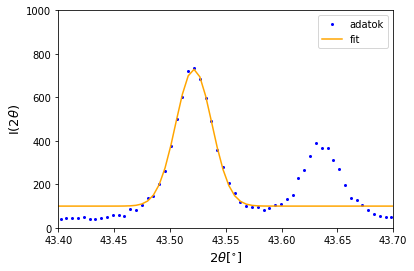

In [45]:
print('f3 inst kiszélesedés csúcs: a, mu, sigma, h')
if3, if3err = illeszt(Gauss, t2_f3_inst, I_f3_inst, 43.47, 43.58, 100, 43.52, 1, 40)
print('2theta =', if3[1], '+-', if3err[1])

plot(t2_f3_inst, I_f3_inst, 'b.', markersize = 4, label = 'adatok')
plot(t2_f3_inst, Gauss(t2_f3_inst, *if3), color = 'orange', label = 'fit')
xlim(43.4, 43.7)
ylim(0, 1000)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('inst_1_csucs.png')

In [46]:
#fwhm
def fwhm(x, y, x1, x2, h):
    csucs = []
    for i in range(len(x)):
        if x[i] > x1 and x[i] < x2:
            csucs.append(y[i] - h) #háttért levontam
        
    I_max = max(csucs)
    xs = [j for j in range(len(csucs)) if csucs[j] > I_max/2]
    bet = (x[max(xs)] - x[min(xs)])*pi/180 #radiánban kell
    
    return bet

In [47]:
TH = linspace(43, 45, 100)
#beta = fwhm(t2_f3, I_f3, 43.5, 44.5, ef3[3])
#beta_i = fwhm(t2_f3_inst, I_f3_inst, 43.45, 43.58, if3[3])
beta = fwhm(TH, Gauss(TH, *ef3), 43.5, 44.5, ef3[3])
beta_i = fwhm(TH, Gauss(TH, *if3), 43.45, 43.58, if3[3])
betaerr = 2.35*ef3err[2]*pi/180
beta_ierr = 2.35*if3err[2]*pi/180
print(beta, '+-', betaerr)
print(beta_i, '+-', beta_ierr)
beta_f = sqrt(beta**2 - beta_i**2)
beta_ferr = (beta*betaerr + beta_i*beta_ierr)/beta_f
print(beta_f, '+-', beta_ferr)

0.0038785094488763983 +- 3.709301581801422e-05
0.0003525917680796726 +- 1.0226107818511823e-05
0.003862449299357333 +- 3.818076105188742e-05


In [48]:
x_vol = 4 * lam[0] / (3 * beta_f * cos(0.5*ef3[1]*pi/180))
x_volerr = (4 * lam[0] / 3) * (abs(1/(beta_f**2 * cos(0.5*ef3[1]*pi/180)) * beta_ferr) + abs(sin(0.5*ef3[1]*pi/180)/(beta_f * cos(0.5*ef3[1]*pi/180)**2)))
print('szemcseméret:', x_vol, '+-', x_volerr, 'nm')

szemcseméret: 57.40806882207315 +- 23.770810295162928 nm


In [49]:
with open('C/4_feladat_Si_GM_01.dat') as f:
    t2_si, I_si, nosé_si =[], [], []
    for sor in f: # így iterálhatunk végig egy adatfolyamon vagy file-on
        if sor[0]!='*': # file-ban lévő komment kiszedése
            t2_si.append( float(sor.split()[0]) )
            I_si.append( float(sor.split()[1]) )
            nosé_si.append( float(sor.split()[2]) )

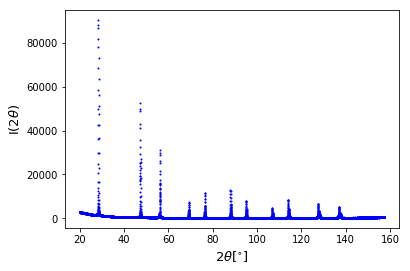

In [50]:
plot(t2_si, I_si, 'b.', markersize = 2)
#xlim(55.8, 56.4)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
savefig('Si_spekt.png')

1. Si csúcs: a, mu, sigma, h
[7.93734473e+04 2.84256855e+01 5.83065353e-02 3.96121968e+03] +- [1.16995608e+03 9.36435190e-04 1.09568854e-03 5.47648882e+02]
2theta = 28.42568552927791 +- 0.0009364351897987079


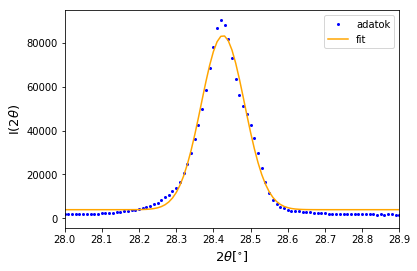

In [51]:
print('1. Si csúcs: a, mu, sigma, h')
esi, esierr = illeszt(Gauss, t2_si, I_si, 28.1, 28.7, 100000, 28.4, 0.1, 4000)
print('2theta =', esi[1], '+-', esierr[1])

plot(t2_si, I_si, 'b.', markersize = 4, label = 'adatok')
plot(t2_si, Gauss(t2_si, *esi), color = 'orange', label = 'fit')
xlim(28, 28.9)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('Si_1_csucs.png')

2. Si csúcs: a, mu, sigma, h
[ 4.58457260e+04  4.72768316e+01 -3.81962433e-02  3.19810303e+03] +- [1.02662366e+03 9.58742059e-04 1.15412971e-03 4.74141484e+02]
2theta = 47.27683158912997 +- 0.0009587420587710071


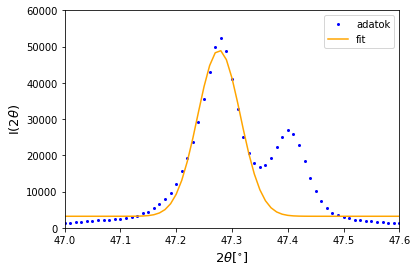

In [52]:
print('2. Si csúcs: a, mu, sigma, h')
ksi, ksierr = illeszt(Gauss, t2_si, I_si, 47, 47.34, 10000, 47.27, 0.1, 4000)
print('2theta =', ksi[1], '+-', ksierr[1])

plot(t2_si, I_si, 'b.', markersize = 4, label = 'adatok')
plot(t2_si, Gauss(t2_si, *ksi), color = 'orange', label = 'fit')
xlim(47, 47.6)
ylim(0, 60000)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('Si_2_csucs.png')

3. Si csúcs: a, mu, sigma, h
[2.72898991e+04 5.60979265e+01 3.66373785e-02 2.43211831e+03] +- [4.90010069e+02 7.61349269e-04 9.69478805e-04 2.80209450e+02]
2theta = 56.097926515927135 +- 0.0007613492688715556


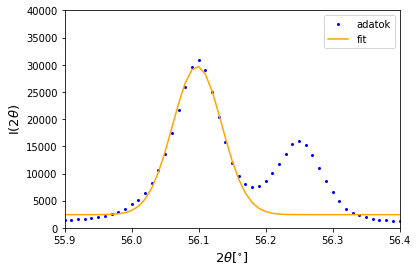

In [53]:
print('3. Si csúcs: a, mu, sigma, h')
hsi, hsierr = illeszt(Gauss, t2_si, I_si, 55.9, 56.15, 10000, 56.1, 0.1, 4000)
print('2theta =', hsi[1], '+-', hsierr[1])

plot(t2_si, I_si, 'b.', markersize = 4, label = 'adatok')
plot(t2_si, Gauss(t2_si, *hsi), color = 'orange', label = 'fit')
xlim(55.9, 56.4)
ylim(0, 40000)
xlabel(r'$2\theta [^{\circ}]$', fontsize = 13)
ylabel(r'I($2\theta$)', fontsize = 13)
legend()
savefig('Si_3_csucs.png')

In [54]:
t_si = array([esi[1], ksi[1], hsi[1]]) * 0.5 * pi / 180
l_si = array([0.154184, 0.154056, 0.154056])
X_si = cos(t_si)**2 * ((1/sin(t_si)) + 1/(t_si))
n_si = array([3, 8, 11])

In [55]:
pd2_si = (2 * sin(t_si) / l_si)**2
dhkl_sierr =abs(((0.01*pi/180)/tan(t_si)) * l_si/(2*sin(t_si)))
pd2_sierr = sqrt(pd2_si**3)*dhkl_sierr

amg_si = sqrt(1/(pd2_si/n_si))
amg_sierr = (1/(2*amg_si)) * n_si/(pd2_si**2) * pd2_sierr
print(amg_si)

[0.54384456 0.5433616  0.54329835]


In [56]:
sum(amg_si)/3

0.5435015026499957

In [57]:
popt_si,pcov_si=curve_fit(lin, X_si, amg_si, sigma = amg_sierr)
perr_si = sqrt(diag(pcov_si))      # az illesztési paraméterek hibáinak meghatározása
print(popt_si, '+-', perr_si)
print('a0=', popt_si[1], '+-', perr_si[1], 'nm')

[1.24602006e-04 5.42877477e-01] +- [1.64492350e-05 7.07147109e-05]
a0= 0.5428774771314613 +- 7.071471089549994e-05 nm


irodalmi érték 0.5431 nm

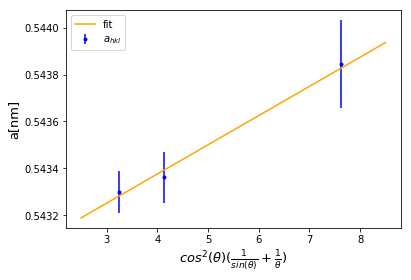

In [58]:
x_si = linspace(2.5, 8.5, 100)
errorbar(X_si, amg_si, yerr = amg_sierr, linestyle = '', marker = '.', color = 'b', label = r'$a_{hkl}$')
plot(x_si, lin(x_si, *popt_si), color = 'orange', label = 'fit')
legend()
xlabel(r'$cos^2(\theta) (\frac{1}{sin(\theta)} + \frac{1}{\theta})$', fontsize = 13)
ylabel('a[nm]', fontsize = 13)
savefig('Si_a.png')